In [1]:
import pandas as pd
import datetime as dt
import nsepy as nse
import pickle as pk

start_date = dt.date(2001,1,1)
end_date = dt.date(2019,1,31)

In [2]:
#data = nse.get_history(symbol="NIFTY 50", start=start_date, end=end_date, index=True)
#pickle_dump = open('nifty_data.pkl', 'ab')
#pk.dump(data,pickle_dump)
#pickle_dump.close()
#data.head()

In [3]:
pickle_dump = open('nifty_data.pkl', 'rb')
data = pk.load(pickle_dump)
pickle_dump.close()
data.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2001-01-01,1263.50,1276.15,1250.65,1254.30,60533274,2.054040e+10
2001-01-02,1254.25,1279.60,1248.55,1271.80,72271588,2.396310e+10
2001-01-03,1271.80,1293.55,1263.95,1291.25,99079153,3.065460e+10
2001-01-04,1291.30,1331.35,1291.30,1307.65,106441914,3.483970e+10
2001-01-05,1307.55,1330.30,1306.25,1327.25,98830568,3.639040e+10


In [4]:
data = data.reset_index()
data.head()

,Date,Open,High,Low,Close,Volume,Turnover
0,2001-01-01,1263.50,1276.15,1250.65,1254.30,60533274,2.054040e+10
1,2001-01-02,1254.25,1279.60,1248.55,1271.80,72271588,2.396310e+10
2,2001-01-03,1271.80,1293.55,1263.95,1291.25,99079153,3.065460e+10
3,2001-01-04,1291.30,1331.35,1291.30,1307.65,106441914,3.483970e+10
4,2001-01-05,1307.55,1330.30,1306.25,1327.25,98830568,3.639040e+10


In [5]:
window_size = 60
sliding_window_size = 30 #gap between start dates of two consecutive windows
analysis_window = []
windows = ((end_date - start_date).days/sliding_window_size)
first_window_size = (1+windows-int(windows))*sliding_window_size - sliding_window_size + window_size
first_window_size = round(first_window_size)
first_window_size = dt.timedelta(first_window_size)
first_window_size
all_other_windows = dt.timedelta(30)
windows = int(windows)
for window in range(windows):
    if window == 0:
        window_start_date = start_date
        window_end_date = start_date + first_window_size
    else:
        window_start_date = window_start_date+dt.timedelta(sliding_window_size)
        window_end_date = window_start_date+dt.timedelta(window_size)
    analysis_window.append((window_start_date, window_end_date))
    print('window: ','start_date:',window_start_date,' end_date:', window_end_date)

window:  start_date: 2001-01-01  end_date: 2001-03-06
window:  start_date: 2001-01-31  end_date: 2001-04-01
window:  start_date: 2001-03-02  end_date: 2001-05-01
window:  start_date: 2001-04-01  end_date: 2001-05-31
window:  start_date: 2001-05-01  end_date: 2001-06-30
window:  start_date: 2001-05-31  end_date: 2001-07-30
window:  start_date: 2001-06-30  end_date: 2001-08-29
window:  start_date: 2001-07-30  end_date: 2001-09-28
window:  start_date: 2001-08-29  end_date: 2001-10-28
window:  start_date: 2001-09-28  end_date: 2001-11-27
window:  start_date: 2001-10-28  end_date: 2001-12-27
window:  start_date: 2001-11-27  end_date: 2002-01-26
window:  start_date: 2001-12-27  end_date: 2002-02-25
window:  start_date: 2002-01-26  end_date: 2002-03-27
window:  start_date: 2002-02-25  end_date: 2002-04-26
window:  start_date: 2002-03-27  end_date: 2002-05-26
window:  start_date: 2002-04-26  end_date: 2002-06-25
window:  start_date: 2002-05-26  end_date: 2002-07-25
window:  start_date: 2002-06

In [6]:
analysis_window

[(datetime.date(2001, 1, 1), datetime.date(2001, 3, 6)),
 (datetime.date(2001, 1, 31), datetime.date(2001, 4, 1)),
 (datetime.date(2001, 3, 2), datetime.date(2001, 5, 1)),
 (datetime.date(2001, 4, 1), datetime.date(2001, 5, 31)),
 (datetime.date(2001, 5, 1), datetime.date(2001, 6, 30)),
 (datetime.date(2001, 5, 31), datetime.date(2001, 7, 30)),
 (datetime.date(2001, 6, 30), datetime.date(2001, 8, 29)),
 (datetime.date(2001, 7, 30), datetime.date(2001, 9, 28)),
 (datetime.date(2001, 8, 29), datetime.date(2001, 10, 28)),
 (datetime.date(2001, 9, 28), datetime.date(2001, 11, 27)),
 (datetime.date(2001, 10, 28), datetime.date(2001, 12, 27)),
 (datetime.date(2001, 11, 27), datetime.date(2002, 1, 26)),
 (datetime.date(2001, 12, 27), datetime.date(2002, 2, 25)),
 (datetime.date(2002, 1, 26), datetime.date(2002, 3, 27)),
 (datetime.date(2002, 2, 25), datetime.date(2002, 4, 26)),
 (datetime.date(2002, 3, 27), datetime.date(2002, 5, 26)),
 (datetime.date(2002, 4, 26), datetime.date(2002, 6, 25))

In [7]:
data.head()

,Date,Open,High,Low,Close,Volume,Turnover
0,2001-01-01,1263.50,1276.15,1250.65,1254.30,60533274,2.054040e+10
1,2001-01-02,1254.25,1279.60,1248.55,1271.80,72271588,2.396310e+10
2,2001-01-03,1271.80,1293.55,1263.95,1291.25,99079153,3.065460e+10
3,2001-01-04,1291.30,1331.35,1291.30,1307.65,106441914,3.483970e+10
4,2001-01-05,1307.55,1330.30,1306.25,1327.25,98830568,3.639040e+10


In [8]:
window=2
df = data[(data.Date >= analysis_window[window][0]) & (data.Date <= analysis_window[window][1])]
df.head()

,Date,Open,High,Low,Close,Volume,Turnover
43,2001-03-02,1360.25,1386.75,1301.80,1306.35,124763272,3.689810e+10
44,2001-03-05,1304.85,1316.45,1259.10,1271.45,121535287,3.470850e+10
45,2001-03-07,1272.80,1311.10,1249.45,1290.50,104381701,2.866470e+10
46,2001-03-08,1290.85,1307.95,1279.30,1292.85,60218168,1.680910e+10
47,2001-03-09,1292.70,1292.70,1219.35,1254.75,60117766,1.460200e+10


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

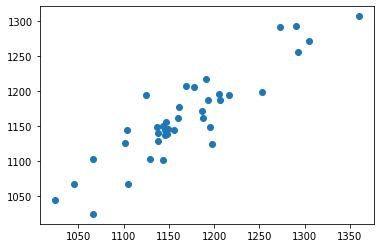

In [10]:
plt.scatter(df.Open, df.Close)

In [11]:
import mpl_finance as mf

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 43 to 81
Data columns (total 7 columns):
Date        39 non-null object
Open        39 non-null float64
High        39 non-null float64
Low         39 non-null float64
Close       39 non-null float64
Volume      39 non-null int64
Turnover    39 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.4+ KB


In [13]:
from matplotlib.dates import date2num
import matplotlib.dates as mdates
df['Matplotlib_Date'] = df['Date'].apply(date2num)
df['x_axis'] = df['Matplotlib_Date'] - min(df['Matplotlib_Date'])
df['y_axis'] = (df['Close']/df['Close'].values[-1])*1000
df

/home/sameer/sm/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sameer/sm/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/sameer/sm/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,Date,Open,High,Low,Close,Volume,Turnover,Matplotlib_Date,x_axis,y_axis
43,2001-03-02,1360.25,1386.75,1301.80,1306.35,124763272,3.689810e+10,730546.0,0.0,1160.942013
44,2001-03-05,1304.85,1316.45,1259.10,1271.45,121535287,3.470850e+10,730549.0,3.0,1129.926683
45,2001-03-07,1272.80,1311.10,1249.45,1290.50,104381701,2.866470e+10,730551.0,5.0,1146.856254
46,2001-03-08,1290.85,1307.95,1279.30,1292.85,60218168,1.680910e+10,730552.0,6.0,1148.944679
47,2001-03-09,1292.70,1292.70,1219.35,1254.75,60117766,1.460200e+10,730553.0,7.0,1115.085537
48,2001-03-12,1253.25,1253.25,1193.95,1197.95,54093815,1.272030e+10,730556.0,10.0,1064.607865
49,2001-03-13,1197.85,1201.15,1098.75,1124.70,69137496,1.577000e+10,730557.0,11.0,999.511220
50,2001-03-14,1125.15,1200.25,1114.60,1194.20,42822737,1.020500e+10,730558.0,12.0,1061.275272
51,2001-03-15,1191.60,1219.70,1170.70,1217.15,47034759,1.143240e+10,730559.0,13.0,1081.670740
52,2001-03-16,1216.90,1233.40,1179.60,1193.55,51146372,1.275810e+10,730560.0,14.0,1060.697623


/home/sameer/sm/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


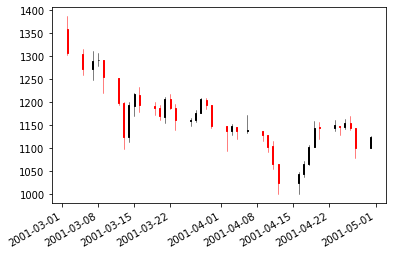

In [14]:
fig, ax = plt.subplots()
quotes = [tuple(x) for x in df[['Matplotlib_Date','Open','High','Low','Close']].values]
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gcf().autofmt_xdate()

_ = mf.candlestick_ohlc(ax,quotes)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
df.x_axis.shape

(39,)

In [17]:
X = df.x_axis.values.reshape(df.x_axis.shape[0],1)
y = df.y_axis
reg = LinearRegression().fit(X, y)

In [18]:
y_pred = reg.predict(X)
y_pred

array([1107.56827896, 1100.09750421, 1095.1169877 , 1092.62672945,
       1090.1364712 , 1082.66569645, 1080.17543819, 1077.68517994,
       1075.19492169, 1072.70466344, 1065.23388868, 1062.74363043,
       1060.25337218, 1057.76311393, 1055.27285568, 1047.80208092,
       1045.31182267, 1042.82156442, 1040.33130617, 1037.84104792,
       1030.37027316, 1027.88001491, 1025.38975666, 1020.40924015,
       1012.9384654 , 1010.44820715, 1007.9579489 , 1005.46769064,
        995.50665764,  993.01639939,  990.52614113,  988.03588288,
        985.54562463,  978.07484988,  975.58459162,  973.09433337,
        970.60407512,  968.11381687,  960.64304211])

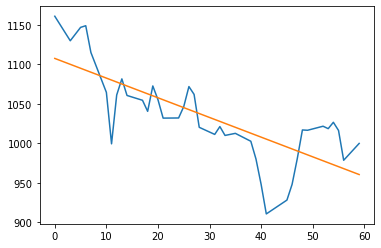

In [19]:
plt.plot(X.flatten(),y)
plt.plot(X.flatten(),y_pred)

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(y,y_pred)) #error

37.129278296843516

In [21]:
(reg.coef_/1000)*100, reg.intercept_

(array([-0.24902583]), 1107.5682789627263)

In [22]:
data[(data.Date >= analysis_window[window+1][0]) & (data.Date <= analysis_window[window+1][1])]['Close'].iloc[10]

1103.4

In [23]:
import zigzag as zg

In [24]:
np.random.seed(1997)
pivots = zg.peak_valley_pivots(y.values, 0.02, -0.02)

In [25]:
pivots

array([ 1,  0,  0,  0,  0,  0, -1,  0,  1,  0,  0, -1,  1,  0, -1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  1,  0, -1,  1])

In [26]:
def plot_pivots(X, y, pivots):
    plt.xlim(X.min(), X.max())
    plt.ylim(y.min()*0.99, y.max()*1.01)
    plt.plot(X, y, 'k:', alpha=0.5)
    plt.plot(X[pivots != 0], y[pivots != 0], 'k-')
    plt.scatter(X[pivots == 1], y[pivots == 1], color='g')
    plt.scatter(X[pivots == -1], y[pivots == -1], color='r')

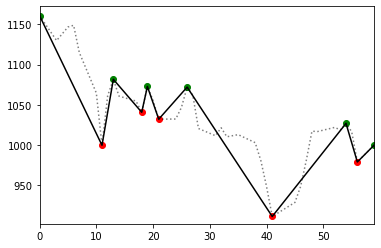

In [27]:
plot_pivots(X.flatten(),y.values, pivots)

In [28]:
def get_downtrend_length(X,y,pivots,inverse_method_used=False):
    l=1
    tops = y.values[pivots == 1]
    for i in range(len(tops)-1):
        ix = -1*(i+1)
        if tops[ix] < tops[ix-1]:
            l = l+1
        else:
            break
    print('downtrend ON from ',l,' tops from end.')
    if inverse_method_used == False:
        length = X[-1][0] - X[np.where(pivots == 1)[0][-1*l]][0]
    else:
        length = X[-1][0] - X[np.where(pivots != 0)[0][-3]][0]
    return length

def get_uptrend_length(X,y,pivots,inverse_method_used=False):
    l=1
    bottoms = y.values[pivots == -1]
    for i in range(len(bottoms)-1):
        ix = -1*(i+1)
        if bottoms[ix] > bottoms[ix-1]:
            l = l+1
        else:
            break
    print('uptrend ON from ',l,' bottoms from end.')
    if inverse_method_used == False:
        length = X[-1][0] - X[np.where(pivots == -1)[0][-1*l]][0]
    else:
        length = X[-1][0] - X[np.where(pivots != 0)[0][-3]][0]
    return length

In [29]:
prev_i = 0
uptrend = False
downtrend = False
inverse_method_used = False  #Uptrend is determined when there are higher bottoms and
                             #Downtrend is determined when there are lower tops.
                             #But if there are not enough points to determine the trend, inverse method is used.
                             #i.e. by looking at the lower bottoms for downtrend or higher tops for uptrend

check = y.values[pivots == 1][-2:]
if check[1] < check[0]:
    downtrend = True

check = y.values[pivots == -1][-2:]
if check[1] > check[0]:
    uptrend = True

if uptrend or downtrend:
    pass
else:
    y1 = y.values[pivots != 0][-3]
    y2 = y.values[pivots != 0][-1]
    if y1 < y2:
        uptrend = True
    else:
        downtrend = True
    inverse_method_used = True

if uptrend:
    trend_length = get_uptrend_length(X,y,pivots,inverse_method_used)
if downtrend:
    trend_length = get_downtrend_length(X,y,pivots,inverse_method_used)
trend_length

uptrend ON from  2  bottoms from end.
downtrend ON from  6  tops from end.


59.0

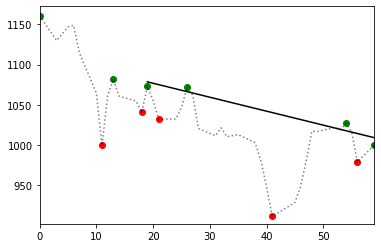

In [30]:
max_points_for_trend = 4

def get_turning_points_for_trend(pivots,trend_length, pvt, max_points_for_trend = 4, inverse_method_used = False):
    if inverse_method_used:
        turning_points = 2
        return turning_points
    
    trend_started_from = len(pivots) - trend_length
    turning_points = len(np.where(np.where(pivots==pvt)[0] >= trend_started_from)[0])
    if turning_points > max_points_for_trend:
        turning_points = max_points_for_trend
    return turning_points

def get_trend_line(X,y,turning_points_for_trend,pivots,pvt, inverse_method_used = False):
    y_for_reg = y.values[pivots==pvt][-1*turning_points_for_trend:]
    X_for_reg = X[np.where(pivots==pvt)[0][-1*turning_points_for_trend:]]
    reg = LinearRegression().fit(X_for_reg, y_for_reg)
    y_pred = reg.predict(X_for_reg)
    return y_pred, reg.coef_

if uptrend: 
    pvt = -1
    if inverse_method_used:
        pvt = pvt*-1
    turning_points_for_trend = get_turning_points_for_trend(pivots,trend_length, pvt, max_points_for_trend, inverse_method_used)
    trend_line, trend_slope = get_trend_line(X,y,turning_points_for_trend,pivots,pvt, inverse_method_used)
    
if downtrend:
    pvt = 1
    if inverse_method_used:
        pvt = pvt*-1
    turning_points_for_trend = get_turning_points_for_trend(pivots,trend_length, pvt, max_points_for_trend, inverse_method_used)
    trend_line, trend_slope = get_trend_line(X,y,turning_points_for_trend,pivots,pvt, inverse_method_used)
    
plt.xlim(X.min(), X.max())
plt.ylim(y.min()*0.99, y.max()*1.01)
plt.plot(X, y, 'k:', alpha=0.5)
plt.plot(X[np.where(pivots==pvt)[0][-1*turning_points_for_trend:]], trend_line, 'k-')
plt.scatter(X[pivots == 1], y[pivots == 1], color='g')
plt.scatter(X[pivots == -1], y[pivots == -1], color='r')

In [31]:
trend_slope, turning_points_for_trend

(array([-1.73887036]), 4)

In [32]:
X_trend = X[int(-1*(trend_length-1)):]
y_trend = y[int(-1*(trend_length-1)):]
reg = LinearRegression().fit(X_trend, y_trend)
y_trend_pred = reg.predict(X_trend)
reg.coef_, reg.intercept_

(array([-2.49025825]), 1107.5682789627263)

In [33]:
y_trend_pred

array([1107.56827896, 1100.09750421, 1095.1169877 , 1092.62672945,
       1090.1364712 , 1082.66569645, 1080.17543819, 1077.68517994,
       1075.19492169, 1072.70466344, 1065.23388868, 1062.74363043,
       1060.25337218, 1057.76311393, 1055.27285568, 1047.80208092,
       1045.31182267, 1042.82156442, 1040.33130617, 1037.84104792,
       1030.37027316, 1027.88001491, 1025.38975666, 1020.40924015,
       1012.9384654 , 1010.44820715, 1007.9579489 , 1005.46769064,
        995.50665764,  993.01639939,  990.52614113,  988.03588288,
        985.54562463,  978.07484988,  975.58459162,  973.09433337,
        970.60407512,  968.11381687,  960.64304211])

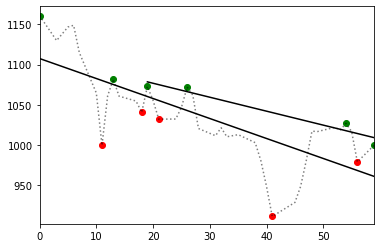

In [34]:
plt.xlim(X.min(), X.max())
plt.ylim(y.min()*0.99, y.max()*1.01)
plt.plot(X, y, 'k:', alpha=0.5)
plt.plot(X[np.where(pivots==pvt)[0][-1*turning_points_for_trend:]], trend_line, 'k-')
plt.plot(X_trend, y_trend_pred, 'k-')
plt.scatter(X[pivots == 1], y[pivots == 1], color='g')
plt.scatter(X[pivots == -1], y[pivots == -1], color='r')

In [35]:
def calc_dis_from_sma(d,y,data):
    last_pos = y.index[-1]
    start_pos = last_pos - d
    if start_pos < 0:
        print('SMA period longer than data available. Consider choosing value of d smaller than the window size.')
        return None
    
    #data dataframe contains the whole data series of the scrip (and not just the window data). 
    #In case the d is longer than window length, then the data for SMA needs to be brought from
    #the whole series i.e. data
    
    sma = (data['Close'].iloc[start_pos:last_pos].mean()/data['Close'].iloc[last_pos])*1000
    dist_from_sma = 1000 - sma
    return dist_from_sma

In [36]:
calc_dis_from_sma(20,y,data)

3.3370362141746455